# Lanczos Algorithm
### Christina Lee 
### Category: Numerics

In [186]:
## Here we create a random symmetric matrix
function makeA(n::Int)
    A=randn(n,n);
    for ii in 1:n
        A[ii,1:ii]=transpose(A[1:ii,ii]) 
    end
    V=eye(n) #initializing the orthogonal transformation
    return A,copy(A)
end
## One A returned will be stored to compare initial and final

function makev(n::Int)
    v=rand(n)
    return v/norm(v)
end

makev (generic function with 1 method)

In [2]:
# This makes a matrix easier to look at when its filled 
# with 1.043848974e-12 everywhere
function prettify(A::Array,rtol::Real=1e-10)
    Ap=copy(A)
    for ii in 1:length(A)
        if abs(Ap[ii])<rtol 
            Ap[ii]=0
        end
    end
    return Ap;
end

prettify (generic function with 2 methods)

In [187]:
n=100;
A,A0=makeA(n);

In [188]:
m=102;
β=Array{Float64}(m);
α=Array{Float64}(m);
va=Array{Array{Float64}}(m);
wp=Array{Float64}(n);
w=Array{Float64}(n);
β[1:2]=zeros(2);
va[1]=zeros(n);
va[2]=zeros(n);
va[2][1]=1;

In [189]:
for ii in 2:(m-1)
    wp=A*va[ii]
    α[ii]=dot(wp,va[ii])
    w=wp-α[ii]*va[ii]-β[ii]*va[ii-1]
    β[ii+1]=norm(w)
    va[ii+1]=w/β[ii+1]
end

In [190]:
T=zeros((m-2),(m-2))
for ii in 1:(m-3)
    T[ii,ii]=α[ii+1]
    T[ii+1,ii]=β[ii+2]
    T[ii,ii+1]=β[ii+2]
end
T[m-2,m-2]=α[m-1]
T;

In [197]:
test1=eigvals(T)

100-element Array{Float64,1}:
 -19.6319
 -19.6319
 -18.376 
 -18.376 
 -17.9468
 -17.9468
 -17.1116
 -17.1116
 -16.6242
 -16.6234
 -16.0791
 -15.9747
 -14.9478
   ⋮     
  15.038 
  15.9028
  16.0158
  16.3338
  16.8644
  16.8645
  17.3321
  17.3321
  18.5302
  18.5302
  18.7511
  18.7511

In [192]:
test2=eigvals(A0)

100-element Array{Float64,1}:
 -19.6319
 -18.376 
 -17.9468
 -17.1116
 -16.6242
 -16.0791
 -15.9747
 -14.9478
 -14.876 
 -14.2238
 -13.7089
 -13.2018
 -12.8072
   ⋮     
  12.7326
  13.7087
  14.1743
  14.4999
  15.038 
  15.9028
  16.0158
  16.3338
  16.8645
  17.3321
  18.5302
  18.7511

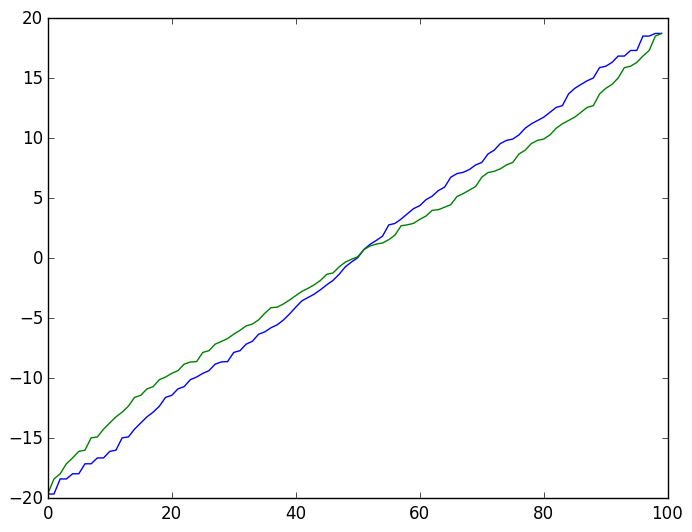

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x326741e50>

In [193]:
pygui(false)
plot(sort(test1))
plot(sort(test2))